In [278]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

In [279]:
# data = [i for i in poisson.rvs(mu=70, size=9*60)/100]

In [280]:
# data = [int(bool(i>0.5)*1) for i in ]

In [281]:
# This fuction is used to create the compute requirements of 
# a service during a day
# It takes in 2 tuples
# hightime: Tuple of lists where each list is start and end of 
#           busytime
# lowtime: Tuple of lists where each list is start and end of 
#           busytime
def dataGen(highTime:list,highTimeMean=70,lowTimeMean=20,workDay=True):
    data = []
    if workDay:
        data+=list(poisson.rvs(mu=lowTimeMean, size=highTime[0]*60)/100)
        data+=list(poisson.rvs(mu=highTimeMean, size=((highTime[1]-highTime[0]+1))*60)/100)
        data+=list(poisson.rvs(mu=lowTimeMean, size=(24-highTime[1]-1)*60)/100)
    else:
        data+=list(poisson.rvs(mu=lowTimeMean, size=24*60)/100)
    return data
    

In [282]:
data = []
for _ in range(30):
    data+=dataGen([8,17])

In [283]:
synthetic = pd.DataFrame({"Active": data})
synthetic.index = pd.date_range(start="2021-07-01", periods=len(data), freq="min")

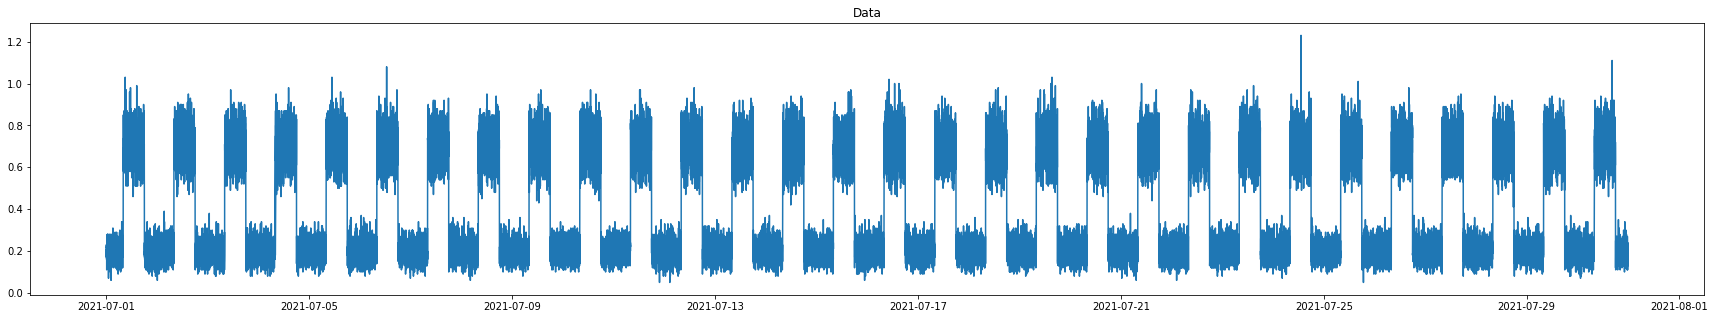

In [284]:
fig = plt.figure(figsize=(30,5))
plt.plot(synthetic.index, synthetic['Active'])
# plt.xticks(rotation=90)
plt.title("Data")
plt.show()

## Dataset with dates

In [285]:
distriList = []
date_df = pd.DataFrame({'Date':pd.date_range(start="2021-01-01", end="2022-01-01", freq="D")})

In [286]:
date_df.shape

(366, 1)

In [287]:
for i in range(len(date_df)):
    if date_df.loc[i,'Date'].strftime('%A') in ['Saturday', 'Sunday']:
        distriList+=dataGen([8,17],workDay=False)
    else:
        distriList+=dataGen([8,17])

In [288]:
# [date.strftime('%A') for date in date_df['Date'][:8]]

In [289]:
# date_df.loc[5,'Date']

In [290]:
len(distriList)

527040

In [291]:
len(pd.date_range(start="2021-01-01", end="2022-01-02", freq="T")[:-1])

527040

In [292]:
dateList = pd.date_range(start="2021-01-01", end="2022-01-02", freq="T")[:-1]
final_df = pd.DataFrame({"Compute": distriList,'Date:':dateList})
# final_df.index = pd.date_range(start="2021-01-01", end="2022-01-01", freq="min")[:-1]

In [293]:
final_df.set_index('Date:',inplace=True)

In [294]:
final_df

,Compute
Date:,
2021-01-01 00:00:00,0.20
2021-01-01 00:01:00,0.28
2021-01-01 00:02:00,0.23
2021-01-01 00:03:00,0.14
2021-01-01 00:04:00,0.19
...,...
2022-01-01 23:55:00,0.17
2022-01-01 23:56:00,0.24
2022-01-01 23:57:00,0.27


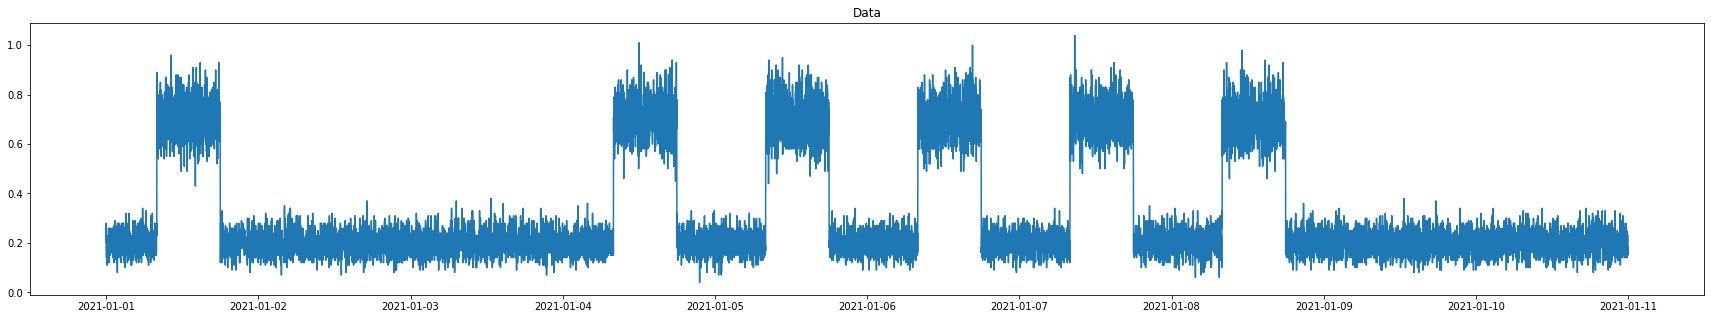

In [299]:
# Plot a part of the data - 10 days
fig = plt.figure(figsize=(30,5))
plt.plot(final_df[:14400].index, final_df[:14400]['Compute'])
# plt.xticks(rotation=90)
plt.title("Data")
plt.show()